In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import myhelper


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as pyplot

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms



In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
                                ])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True, train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True, train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/fc_model.py



--2021-05-21 15:54:55--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-05-21 15:54:56--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/fc_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3543 (3.5K) [text/plain]
Saving to: ‘fc_model.py’

fc_model.py         100%[===================>]   3.46K  --.-KB/s  

<AxesSubplot:>

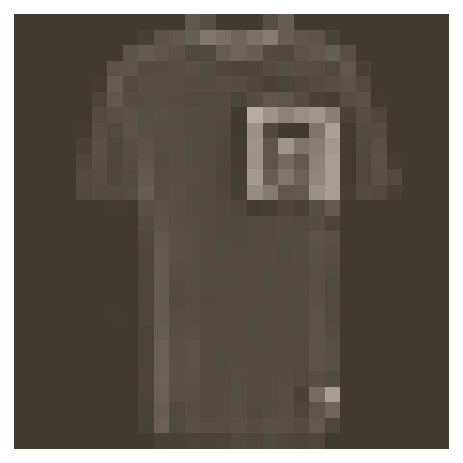

In [7]:
import helper
image,label = next(iter(trainloader))
helper.imshow(image[2,:])

In [9]:
import fc_model
model = fc_model.Network(784,10,[512,256,128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)


In [10]:
fc_model.train(model,trainloader,testloader,criterion,optimizer,epochs=2)

Epoch: 1/2..  Training Loss: 1.695..  Test Loss: 1.015..  Test Accuracy: 0.637
Epoch: 1/2..  Training Loss: 1.058..  Test Loss: 0.729..  Test Accuracy: 0.728
Epoch: 1/2..  Training Loss: 0.901..  Test Loss: 0.696..  Test Accuracy: 0.736
Epoch: 1/2..  Training Loss: 0.825..  Test Loss: 0.668..  Test Accuracy: 0.740
Epoch: 1/2..  Training Loss: 0.738..  Test Loss: 0.648..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.740..  Test Loss: 0.602..  Test Accuracy: 0.763
Epoch: 1/2..  Training Loss: 0.687..  Test Loss: 0.583..  Test Accuracy: 0.773
Epoch: 1/2..  Training Loss: 0.670..  Test Loss: 0.565..  Test Accuracy: 0.783
Epoch: 1/2..  Training Loss: 0.660..  Test Loss: 0.541..  Test Accuracy: 0.792
Epoch: 1/2..  Training Loss: 0.659..  Test Loss: 0.567..  Test Accuracy: 0.795
Epoch: 1/2..  Training Loss: 0.635..  Test Loss: 0.534..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.605..  Test Loss: 0.523..  Test Accuracy: 0.812
Epoch: 1/2..  Training Loss: 0.610..  Test Loss: 0.5

In [15]:
print("Our model: ",model)
print("State dic keys: ", model.state_dict().keys())

Our model:  Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
State dic keys:  odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [34]:
checkpoint = { 'input_size':784,
              'output_size':10,
              'hidden_layers':[each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()    
                }
torch.save(checkpoint,'checkpoint.pth')

In [28]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                            checkpoint['output_size'],
                            checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [35]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
